In [21]:
from qiskit import *
from qiskit_aer import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
import math

In [22]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [23]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [24]:
def run_on_simulators(circuit):
    statevec_job = statevector_simulator.run(circuit)
    result = statevec_job.result()
    statevec = result.get_statevector()

    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])

    qasm_job = qasm_simulator.run(circuit, shots=1024).result()
    counts = qasm_job.get_counts()

    return statevec, counts

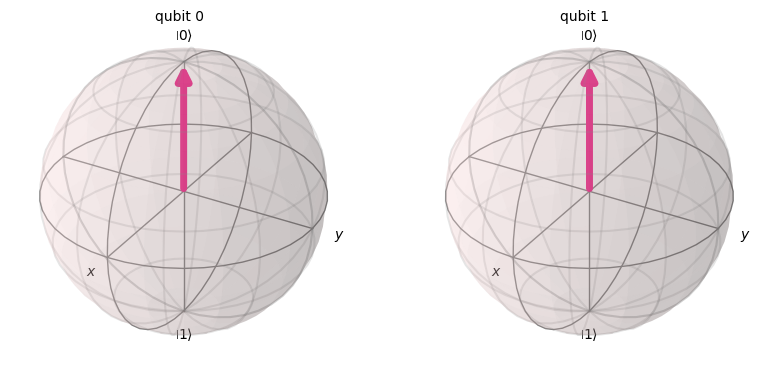

In [27]:
circuit = QuantumCircuit(2, 2)
statevec, counts = run_on_simulators(circuit)

plot_bloch_multivector(statevec)

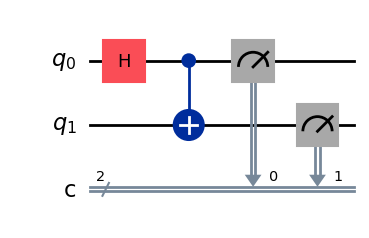

In [29]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output='mpl')

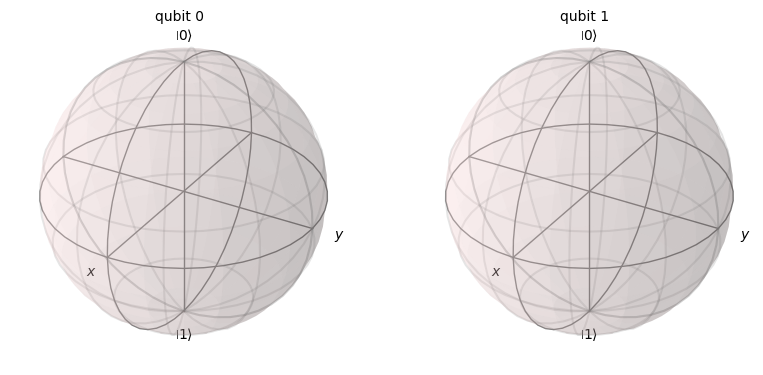

In [30]:
plot_bloch_multivector(statevec)

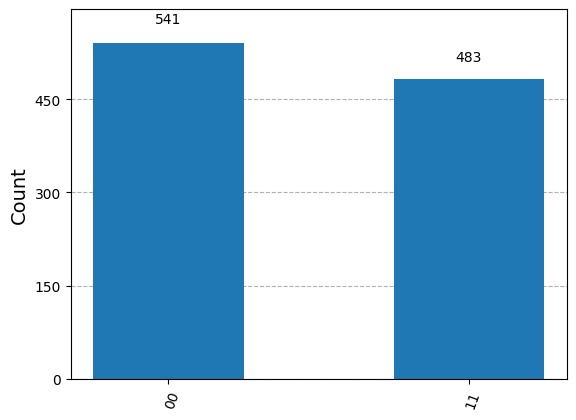

In [32]:
plot_histogram([counts])

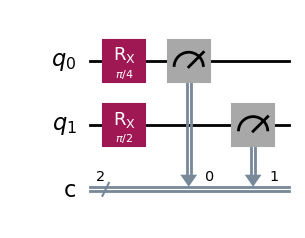

In [33]:
circuit = QuantumCircuit(2, 2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output='mpl')

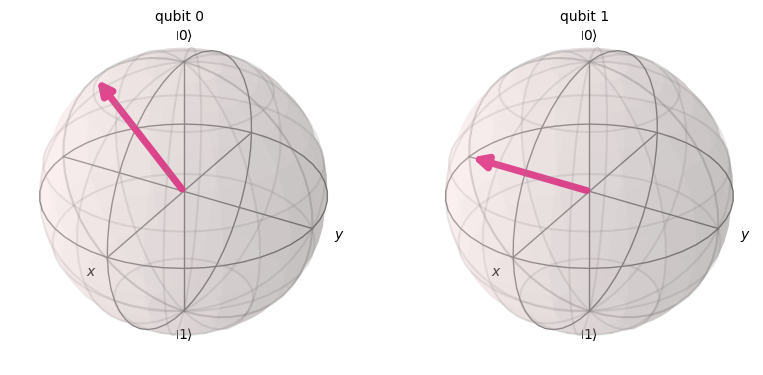

In [34]:
plot_bloch_multivector(statevec)